In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Linear Regression

In [ ]:
# Import dataset
df = pd.read_csv("File Path...", sep = ";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


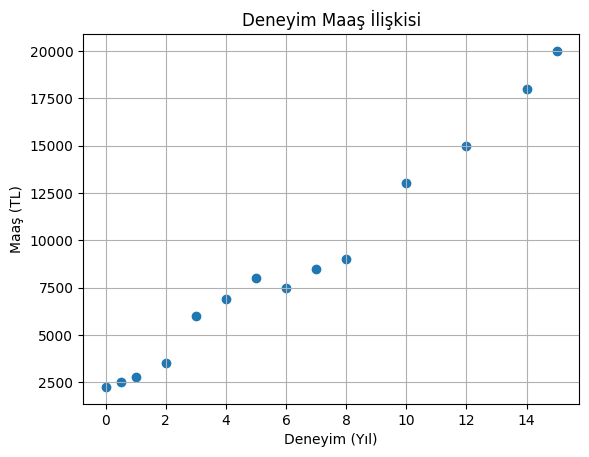

In [ ]:
# veriyi görselleştirme
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [ ]:
#Doğrusal regresyon modeli
linear_reg = LinearRegression()

#data içerisindeki sütunları numpy array e çevir
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

#doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [ ]:
#y eksenini kestiği nokta intercept bulunması
y_ekseni_kesisim = np.array([0]).reshape(-1,1)
b0 = linear_reg.predict(y_ekseni_kesisim)
print("b0:", b0)

#y eksenini kestiği nokta (intercept)
b0_ = linear_reg.intercept_
print("b0_:",b0_)

#eğim (slope) bulunması
b1 = linear_reg.coef_
print("b1:",b1)

b0: [[1663.89519747]]
b0_: [1663.89519747]
b1: [[1138.34819698]]


In [ ]:
#maas = 1663 + (1138 * deneyim)

#farklı bir deneyimi hesapla
deneyim = 11
sonuc = linear_reg.predict(np.array([deneyim]).reshape(1,-1))
print("11 yıllık deneyime sahip çalışan maaşı: {} TL".format(sonuc[0]))

11 yıllık deneyime sahip çalışan maaşı: [14185.72536421] TL


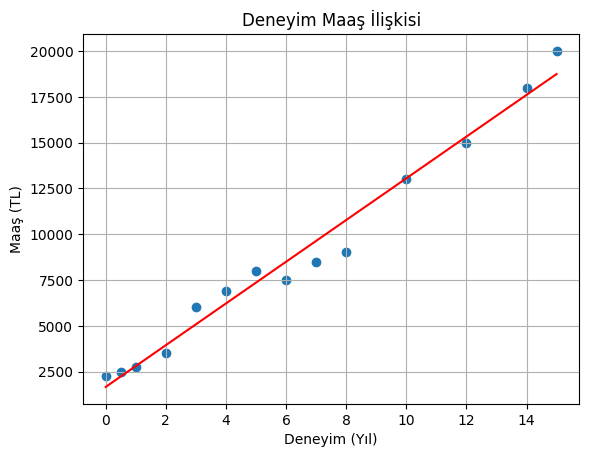

In [ ]:
#Doğrusal Regresyon Modelini Görselleştirme
#Tahmini Görselleştir
array = np.arange(0,16).reshape(-1,1)

plt.figure()
plt.scatter(x,y)

#0-15 yılları arasında deneyime sahip kişilerin maaşlarını tahmin eder
y_head = linear_reg.predict(array)

plt.plot(array, y_head, color = "red")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

# Çoklu Doğrusal Regresyon

In [ ]:
# Veri setini getir
df = pd.read_csv("File Path...", sep = ";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [ ]:
#verisetinden deneyim ve yaşı bağımsız değişkenler olarak al
x = df.iloc[:,[0,2]].values
print(x)

#Bir diğer yöntem
x_ = df[["deneyim","yas"]].values

[[ 0.5 22. ]
 [ 0.  21. ]
 [ 1.  23. ]
 [ 5.  25. ]
 [ 8.  28. ]
 [ 4.  23. ]
 [15.  35. ]
 [ 7.  29. ]
 [ 3.  22. ]
 [ 2.  23. ]
 [12.  32. ]
 [10.  30. ]
 [14.  34. ]
 [ 6.  27. ]]


In [ ]:
y = df.maas.values.reshape(-1,1)
print(y)

[[ 2500]
 [ 2250]
 [ 2750]
 [ 8000]
 [ 9000]
 [ 6900]
 [20000]
 [ 8500]
 [ 6000]
 [ 3500]
 [15000]
 [13000]
 [18000]
 [ 7500]]


In [ ]:
#Çoklu Doğrusal Regresyon Modeli
coklu_dogrusal_regresyon = LinearRegression()

#Model eğitimi
coklu_dogrusal_regresyon.fit(x,y)

LinearRegression()

In [ ]:
#Test 1
test_verisi1 = np.array([[10,35]]) #10 yıl deneyim, 3 yaş
test_sonucu1 = coklu_dogrusal_regresyon.predict(test_verisi1)
print("10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: {} TL".format(test_sonucu1))

10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [[11046.35815877]] TL


# Polinomsal Regresyon

In [ ]:
# Veri setini getir
df = pd.read_csv("File Path...", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
y = df.araba_max_hiz.values.reshape(-1,1)
x = df.araba_fiyat.values.reshape(-1,1)

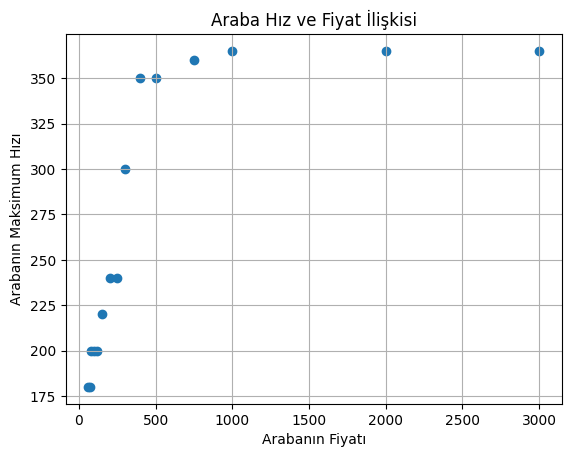

In [ ]:
plt.scatter(x,y)
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Arabanın Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [ ]:
polinom_regresyon = PolynomialFeatures(degree = 4) #4.dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
print(x_polinom)
#çıktılar sırasıyla beta0, beta1, beta2, beta3 ve beta4 değerleridir

[[1.0000000e+00 6.0000000e+01 3.6000000e+03 2.1600000e+05 1.2960000e+07]
 [1.0000000e+00 7.0000000e+01 4.9000000e+03 3.4300000e+05 2.4010000e+07]
 [1.0000000e+00 8.0000000e+01 6.4000000e+03 5.1200000e+05 4.0960000e+07]
 [1.0000000e+00 1.0000000e+02 1.0000000e+04 1.0000000e+06 1.0000000e+08]
 [1.0000000e+00 1.2000000e+02 1.4400000e+04 1.7280000e+06 2.0736000e+08]
 [1.0000000e+00 1.5000000e+02 2.2500000e+04 3.3750000e+06 5.0625000e+08]
 [1.0000000e+00 2.0000000e+02 4.0000000e+04 8.0000000e+06 1.6000000e+09]
 [1.0000000e+00 2.5000000e+02 6.2500000e+04 1.5625000e+07 3.9062500e+09]
 [1.0000000e+00 3.0000000e+02 9.0000000e+04 2.7000000e+07 8.1000000e+09]
 [1.0000000e+00 4.0000000e+02 1.6000000e+05 6.4000000e+07 2.5600000e+10]
 [1.0000000e+00 5.0000000e+02 2.5000000e+05 1.2500000e+08 6.2500000e+10]
 [1.0000000e+00 7.5000000e+02 5.6250000e+05 4.2187500e+08 3.1640625e+11]
 [1.0000000e+00 1.0000000e+03 1.0000000e+06 1.0000000e+09 1.0000000e+12]
 [1.0000000e+00 2.0000000e+03 4.0000000e+06 8.00000

In [ ]:
lr = LinearRegression()
lr.fit(x_polinom, y)

LinearRegression()

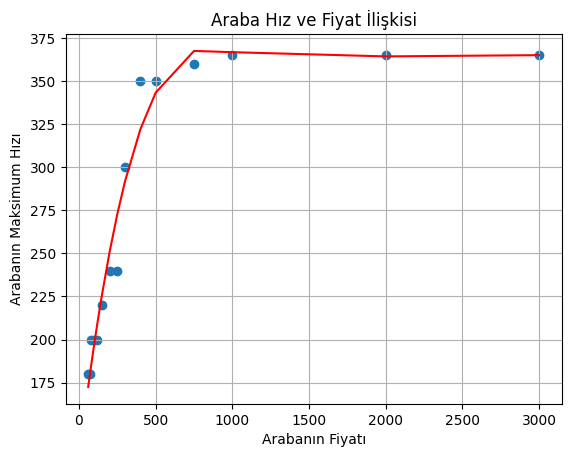

In [ ]:
#tahmin
y_tahmin = lr.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x, y_tahmin, color = "red")
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Arabanın Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()